### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 📜 1. Overview</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Introduction:</font></h3>

* Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
* Food Mart was the nation's third-largest chain of convenience stores as of 1988. The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
* Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s. **The task is to devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.**

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Data description:</font></h3>
original explanation:</br>

1. store_sales(in millions) ---- store_sales(in million dollars)
2. unit_sales(in millions) ---- unit_sales(in millions) in stores Quantity
3. Total_children ---- total children in home
4. avg_cars_at home(approx) ---- avg_cars_at home(approx)
5. Num_children_at_home ---- num_children_at_home AS PER CUSTOMERS FILLED DETAILS
6. Gross_weight ---- gross_weight OF ITEM
7. Recyclable_package ---- FOOD ITEM IS recyclable_package
8. Low_fat ---- LOW_FAT FOOD ITEM IS LOW FAT
9. Units_per_case ---- UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
10. Store_sqft ---- STORE AREA AVAILABLE IN SQFT
11. Coffee_bar ---- COFFEE BAR available in store
12. Video_store ---- VIDEO STORE/gaming store available
13. Salad_bar ---- SALAD BAR available in store
14. Prepared_food ---- food prepared available in store
15. Florist ---- flower shelves available in store
16. Cost ---- COST ON ACQUIRING A CUSTOMERS in dollars

To the features of 'Total_Children' and 'Num_Children_At_Home', There is some explanation I think is reasonable
* Total_Children : Total number of children the customer has
* Num_Children_At_Home : Out of the total, How many children reside in the customers household.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance

In [5]:
train_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv") 
original = pd.read_csv("train_dataset.csv")

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
**Rename the Features in my realization :**
</div>

In [6]:
train_raw = train_raw.drop(columns="id")
test_raw = test_raw.drop(columns="id")
columns = {'store_sales(in millions)':'Store Sales(in millions)',
          'unit_sales(in millions)': 'Unit Sales(in millions)',
          'total_children':'Total Children',
          'num_children_at_home':'Number of Children At Home',
          'avg_cars_at home(approx).1':'Average of Car',
          'gross_weight':'Gross Weight',
          'recyclable_package':'Has Recyclable Package',
          'low_fat':'Has Low Fat',
          'units_per_case':'Units Per Case',
          'store_sqft':'Store Area',
          'coffee_bar':'Has Coffee Bar',
          'video_store':'Has Entertainment',
          'salad_bar':'Has Salad Bar',
          'prepared_food':'Has Prepared Food',
          'florist':'Has Florist',
          'cost':'Cost'}
train = train_raw.rename(columns=columns)
test = test_raw.rename(columns=columns)
train.head(5)

,Store Sales(in millions),Unit Sales(in millions),Total Children,Number of Children At Home,Average of Car,Gross Weight,Has Recyclable Package,Has Low Fat,Units Per Case,Store Area,Has Coffee Bar,Has Entertainment,Has Salad Bar,Has Prepared Food,Has Florist,Cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [7]:
train.shape

(360336, 16)

In [7]:
train.dtypes

Store Sales(in millions)      float64
Unit Sales(in millions)       float64
Total Children                float64
Number of Children At Home    float64
Average of Car                float64
Gross Weight                  float64
Has Recyclable Package        float64
Has Low Fat                   float64
Units Per Case                float64
Store Area                    float64
Has Coffee Bar                float64
Has Entertainment             float64
Has Salad Bar                 float64
Has Prepared Food             float64
Has Florist                   float64
Cost                          float64
dtype: object

In [8]:
train.describe()

,Store Sales(in millions),Unit Sales(in millions),Total Children,Number of Children At Home,Average of Car,Gross Weight,Has Recyclable Package,Has Low Fat,Units Per Case,Store Area,Has Coffee Bar,Has Entertainment,Has Salad Bar,Has Prepared Food,Has Florist,Cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [9]:
train.isna().sum()

Store Sales(in millions)      0
Unit Sales(in millions)       0
Total Children                0
Number of Children At Home    0
Average of Car                0
Gross Weight                  0
Has Recyclable Package        0
Has Low Fat                   0
Units Per Case                0
Store Area                    0
Has Coffee Bar                0
Has Entertainment             0
Has Salad Bar                 0
Has Prepared Food             0
Has Florist                   0
Cost                          0
dtype: int64

In [10]:
test.isna().sum()

Store Sales(in millions)      0
Unit Sales(in millions)       0
Total Children                0
Number of Children At Home    0
Average of Car                0
Gross Weight                  0
Has Recyclable Package        0
Has Low Fat                   0
Units Per Case                0
Store Area                    0
Has Coffee Bar                0
Has Entertainment             0
Has Salad Bar                 0
Has Prepared Food             0
Has Florist                   0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Insights:</font></h3>

* **It is no NaN values on train and test**
* **All variables are float64 type. But some of them are categorical variables, need to be converted later.**
* **The train has 360336 rows with 16 columns(features)**

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 2. Explore data analysis(EDA) </p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Summary of EDA:</font></h3>

* **I add some the feature likes 'Children_Ratio', Idea from https://www.kaggle.com/competitions/playground-series-s3e11/discussion/396291**
    
* **The feature 'Store Area' has just 20 different unique values, it can be identified as Discrete Features rather than Continuous Features.**
    
* **Correlation Analysis in Discrete Features and Continuous Features.**

#### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 0px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">2.1 Feature Engineering </p>

In [9]:
train['Children_Ratio'] = train['Total Children'] / train['Number of Children At Home']
train['Children_Ratio'] = train['Children_Ratio'].replace([np.inf, -np.inf], 10)
train['Children_Ratio'].fillna(0, inplace=True)
train[['Total Children','Number of Children At Home','Children_Ratio']]

C:\Users\sonis\AppData\Local\Temp\ipykernel_30172\1105896467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Children_Ratio'].fillna(0, inplace=True)


,Total Children,Number of Children At Home,Children_Ratio
0,2.0,2.0,1.0
1,4.0,0.0,10.0
2,0.0,0.0,0.0
3,5.0,0.0,10.0
4,5.0,0.0,10.0
...,...,...,...
360331,5.0,5.0,1.0
360332,4.0,0.0,10.0
360333,0.0,0.0,0.0
360334,1.0,0.0,10.0


In [10]:
train.dtypes

Store Sales(in millions)      float64
Unit Sales(in millions)       float64
Total Children                float64
Number of Children At Home    float64
Average of Car                float64
Gross Weight                  float64
Has Recyclable Package        float64
Has Low Fat                   float64
Units Per Case                float64
Store Area                    float64
Has Coffee Bar                float64
Has Entertainment             float64
Has Salad Bar                 float64
Has Prepared Food             float64
Has Florist                   float64
Cost                          float64
Children_Ratio                float64
dtype: object

In [11]:
train.nunique()

Store Sales(in millions)      1044
Unit Sales(in millions)          6
Total Children                   6
Number of Children At Home       6
Average of Car                   5
Gross Weight                   384
Has Recyclable Package           2
Has Low Fat                      2
Units Per Case                  36
Store Area                      20
Has Coffee Bar                   2
Has Entertainment                2
Has Salad Bar                    2
Has Prepared Food                2
Has Florist                      2
Cost                           328
Children_Ratio                  14
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

* **There are many ordinal and categorical features, later we will extract them.**
* **we can find that the feature of 'store_sqft' just have 20 different behavior, it is not common in the data with 360336 rows.
Maybe 'store_sqft' represent 20 different stores.**

#### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 0px; color:#006600; font-size:90%; text-align:left;padding: 0px;"> Valiate the feature of 'Store Area' whether represent 20 different stores below :</p>

In [12]:
store_features = ['Has Florist','Has Prepared Food','Has Coffee Bar','Has Entertainment','Has Salad Bar']
train.groupby('Store Area')[store_features].nunique()

,Has Florist,Has Prepared Food,Has Coffee Bar,Has Entertainment,Has Salad Bar
Store Area,,,,,
20319.0,1,1,2,1,1
21215.0,2,2,1,1,2
22478.0,2,2,2,1,2
23112.0,2,2,2,2,2
23593.0,2,1,2,1,1
23598.0,2,2,2,1,2
23688.0,2,2,1,2,2
23759.0,2,2,2,1,2
24597.0,2,2,1,2,2


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Explanation:</font></h3>

* Grouping by the 'store_features', if all the value of table above for each row is 1, it means that the each 'store_sqft' represent a store individly. But disappointing it has many '2' in the table.
* Maybe it is something wrong in recording of the raw data, or the store only locating in some specified market which have the same 'sqft', but I doubt it.
Now I assume the former is correct, and I prove it below.

In [13]:
store_category = train.groupby('Store Area')[store_features]
one_rate = (store_category.sum() / store_category.count())*100
one_rate

,Has Florist,Has Prepared Food,Has Coffee Bar,Has Entertainment,Has Salad Bar
Store Area,,,,,
20319.0,0.000000,0.000000,1.171514,0.000000,0.000000
21215.0,0.141478,0.003144,100.000000,0.000000,0.003144
22478.0,0.300793,0.177741,99.986328,0.000000,0.191414
23112.0,99.724177,98.716578,99.988742,98.238109,98.716578
23593.0,0.597794,0.000000,1.338722,0.000000,0.000000
23598.0,99.868505,0.026973,1.807209,0.000000,0.026973
23688.0,99.993778,99.446242,100.000000,97.660528,99.446242
23759.0,99.765635,99.805812,99.752243,0.000000,99.805812
24597.0,0.086059,0.028686,100.000000,0.028686,0.057372


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Explanation:</font></h3>

* Cause all the feature in 'store_features' are binary(0 or 1), so I apply the function "sum()" means that there are how many values of those feature are equal to '1'. The 'count()' is to calculate the number of features(no matter 0 or 1). </br>
* So "sum() / count()" means that the value '1' proportion of the feature.</br>
* If the 'one_rate' all approach to 100% or 0%, and no middle value, it reveal that it has outlier data. And the assumption of "something wrong in recording" is properly correct

<Axes: xlabel='Store Area'>

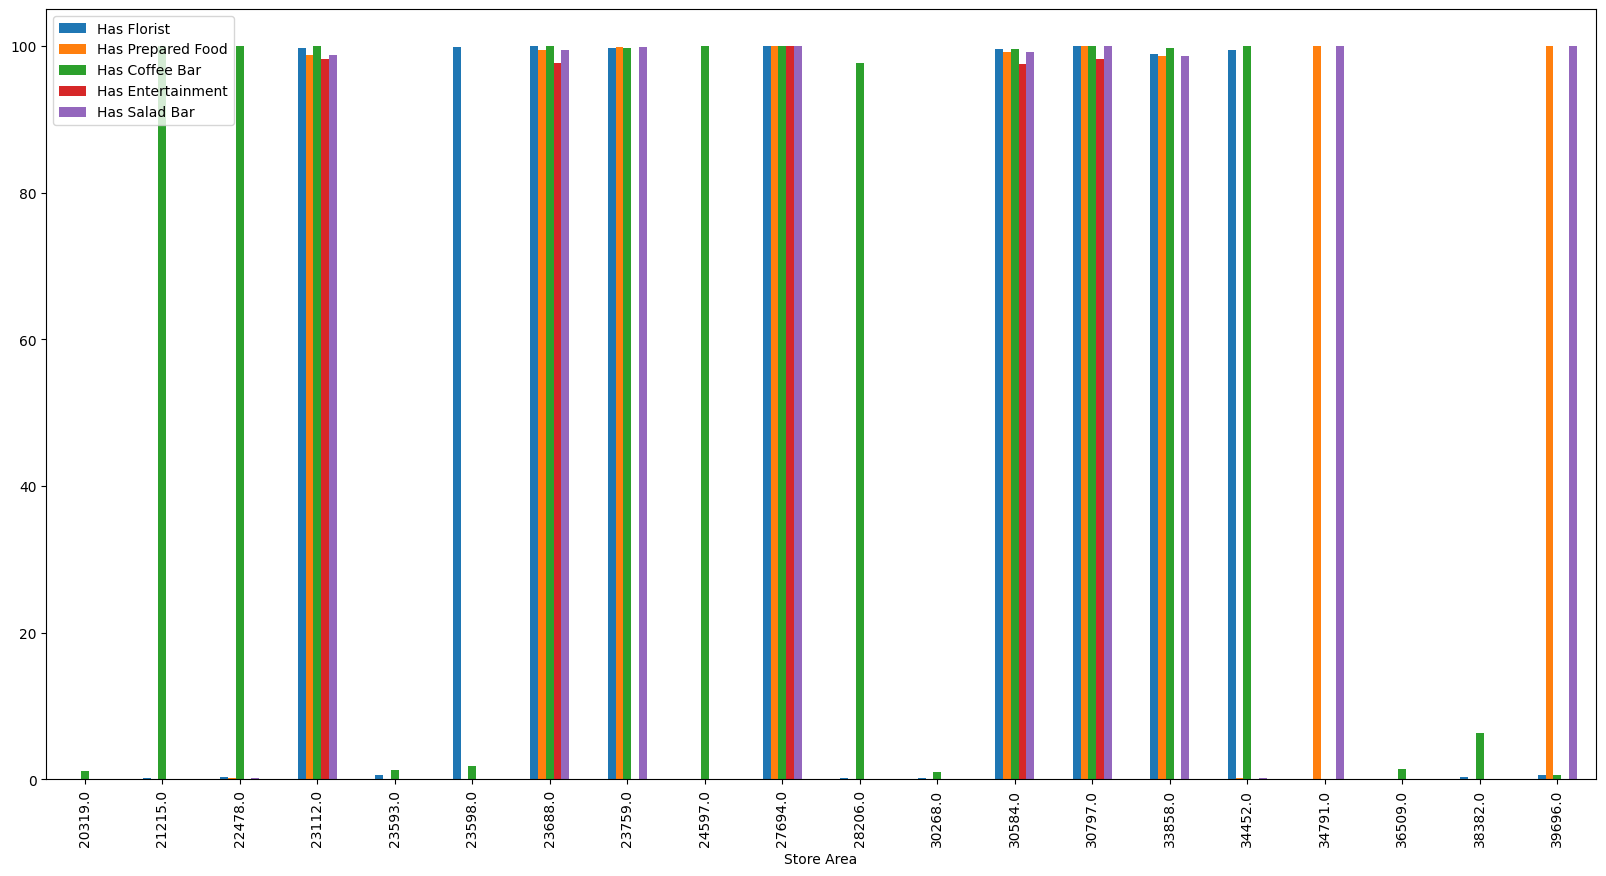

In [14]:
one_rate.plot(kind='bar',figsize=(20,10))

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Insights:</font></h3>

* Now,by watching this chart, we can directly know all this feature approach to 100% or 0%, and no middle value</br>
* **💡 conclusion: It is just only 20 stores in the data of train.**

**Convert the type :**

In [15]:
train = train.convert_dtypes()
train.dtypes

Store Sales(in millions)      Float64
Unit Sales(in millions)         Int64
Total Children                  Int64
Number of Children At Home      Int64
Average of Car                  Int64
Gross Weight                  Float64
Has Recyclable Package          Int64
Has Low Fat                     Int64
Units Per Case                  Int64
Store Area                      Int64
Has Coffee Bar                  Int64
Has Entertainment               Int64
Has Salad Bar                   Int64
Has Prepared Food               Int64
Has Florist                     Int64
Cost                          Float64
Children_Ratio                Float64
dtype: object

#### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">2.2 Correlation Analysis</p>

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
Before analyse the correlation of each feature, we should divide the feature into Continuous Features and Discrete Features，and more specifically Discrete Features also can divide into ordinal Features and Category Features
    
</div>

In [16]:
continuous_features = ['Store Sales(in millions)','Unit Sales(in millions)','Gross Weight','Cost']
ordinal_features=['Average of Car','Total Children','Store Area', 'Units Per Case']
category_features=['Has Recyclable Package','Has Low Fat','Has Coffee Bar','Has Entertainment','Has Salad Bar','Has Prepared Food','Has Florist']
discrete_features=ordinal_features + category_features

##### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">2.1.1 Continuous Features</p>

Text(0.5, 1.0, 'Continuous Feature Correlations')

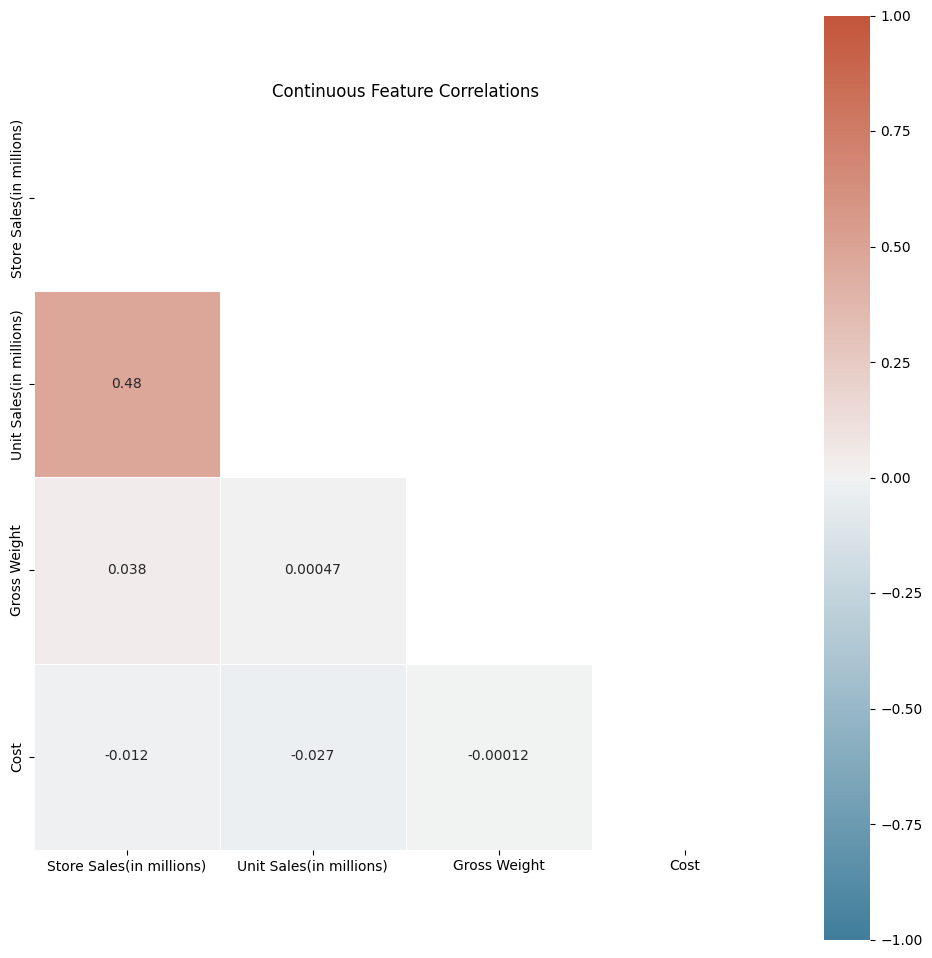

In [17]:
continuous_features_corr = train[continuous_features].corr()
fig, axes = plt.subplots(figsize = (12,12))
mask = np.zeros_like(continuous_features_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(continuous_features_corr,mask=mask,linewidths=0.5,square=True,linecolor="white",annot=True,cmap=sns.diverging_palette(230, 20, as_cmap = True),vmin=-1,vmax=1)
plt.title("Continuous Feature Correlations")

<div style="border-radius:1px; border:#DEB887 solid; padding: 10px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Insights:</font></h3>

**It look like that all this features with no correlation to 'Cost', considering to drop it later**

##### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">2.1.2 Discrete Features</p>

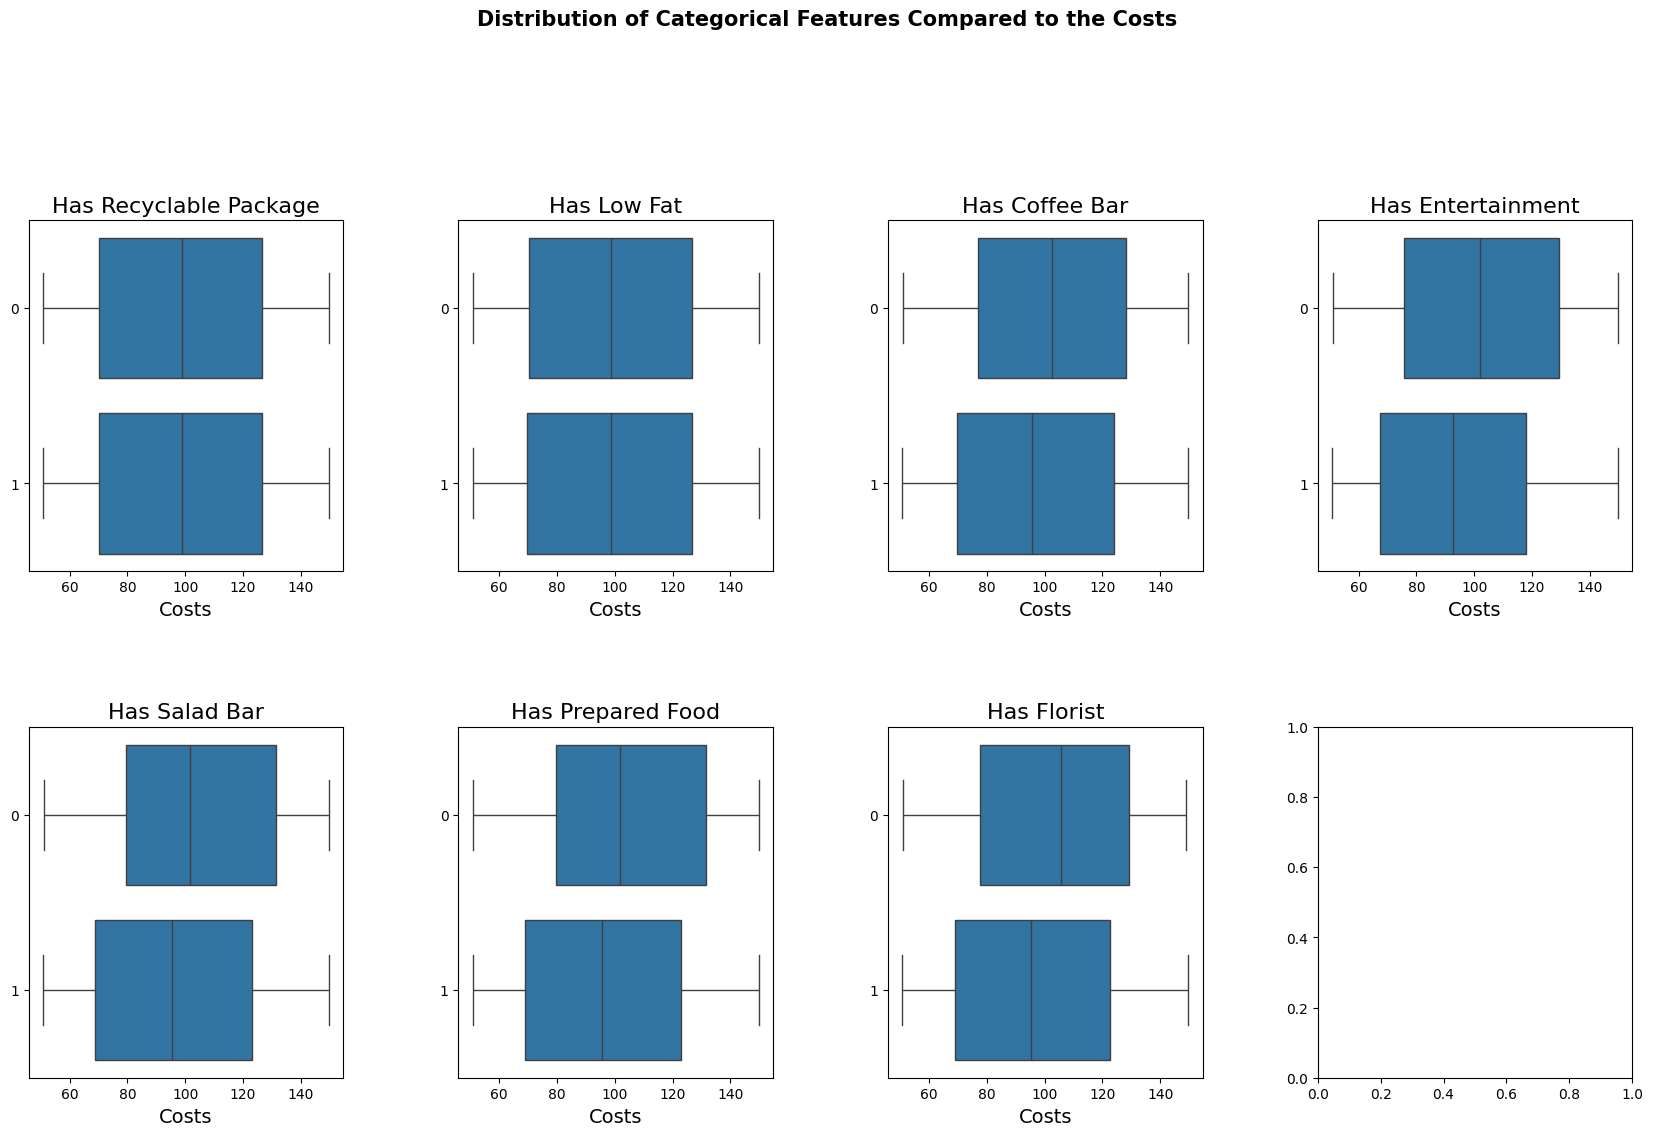

In [18]:
train_category = train.copy()
train_category[category_features] = train_category[category_features].astype('category')

col_num = 4
row_num = int(np.ceil(len(category_features) / col_num))
figure, axes = plt.subplots(nrows=row_num, ncols=col_num,figsize=(18, row_num * 6))

axes = axes.flatten()
figure.suptitle(
    'Distribution of Categorical Features Compared to the Costs',
    ha='center', fontweight='bold', fontsize=15, y=1
)

for ax, column in enumerate(category_features):
    sns.boxplot(data=train_category, x='Cost', y=column, ax=axes[ax])
    axes[ax].set_xlabel('Costs', fontsize=14)
    axes[ax].set_ylabel(None)
    axes[ax].set_title(column, fontsize=16)
figure.tight_layout(pad=6)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

**The feature 'Has Recyclable Package' and 'Has Low Fat' has no much correlation with 'Cost',we can consider to drop it. And we can find that the cost are higher when the value of remaining features is 0.**

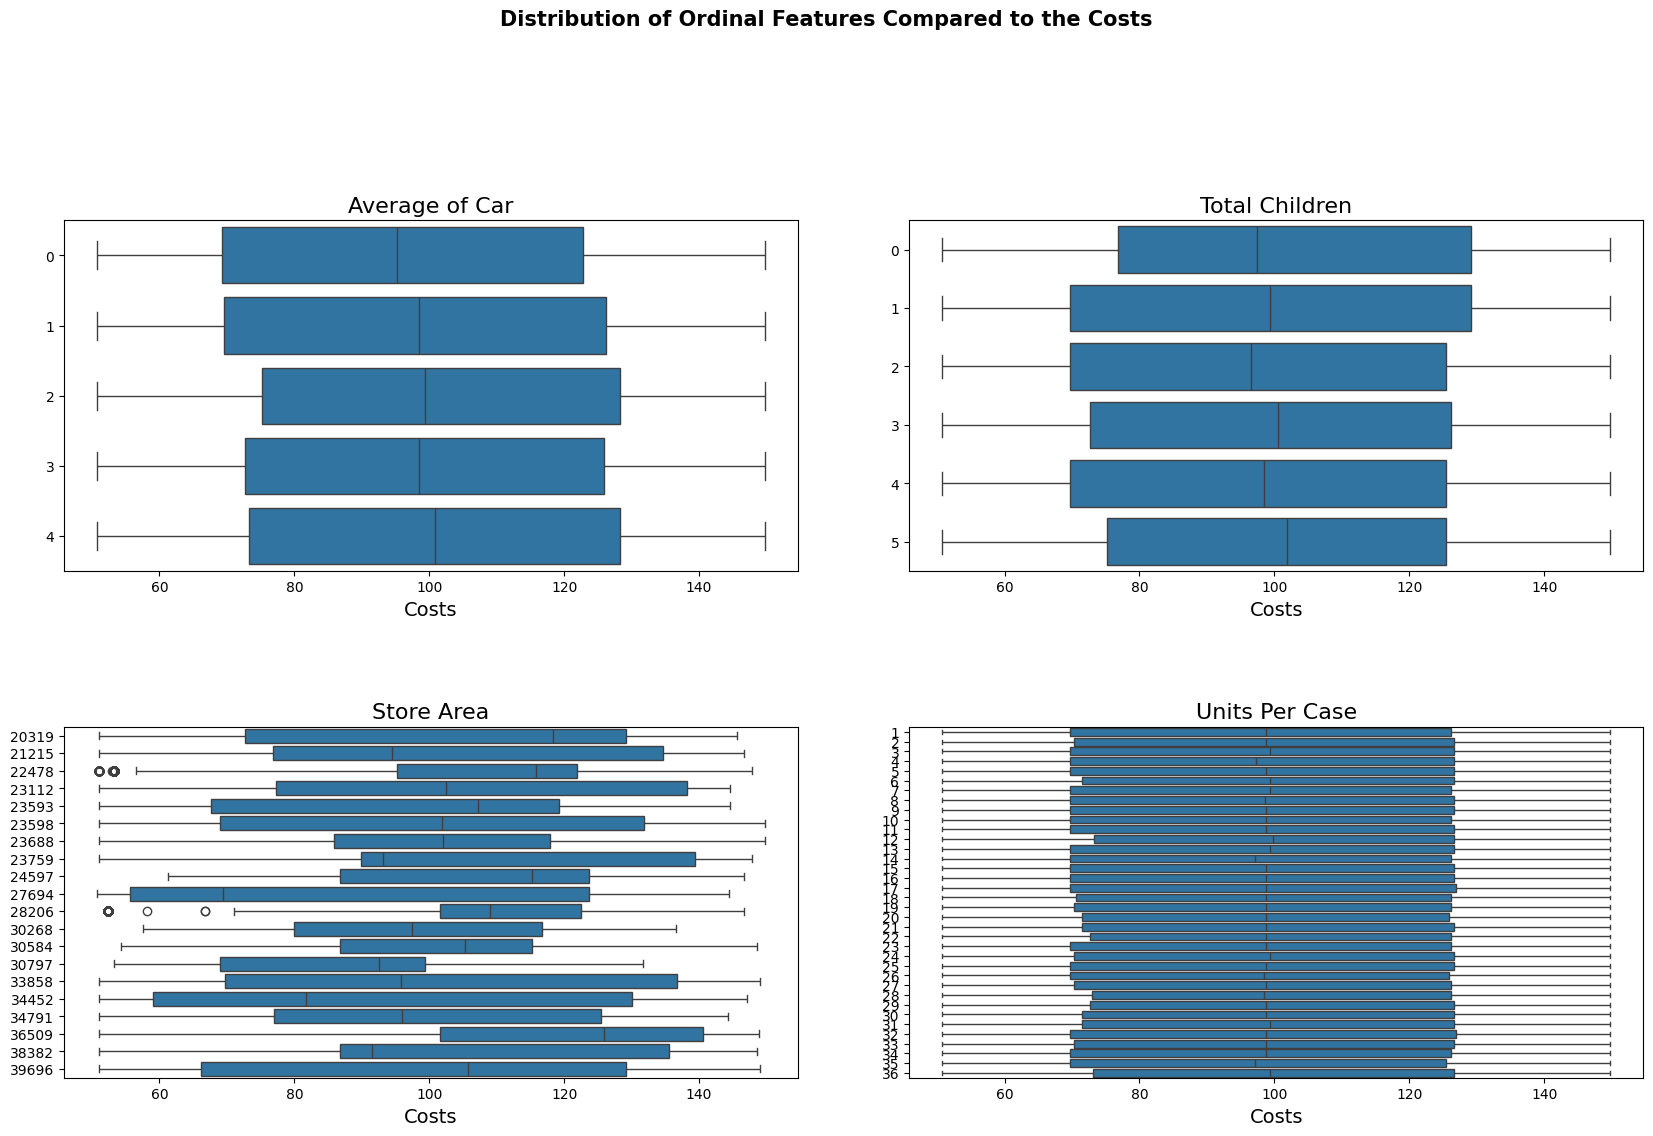

In [19]:
train_ordinal = train.copy()
train_ordinal[ordinal_features] = train_ordinal[ordinal_features].astype('category')

col_num = 2
row_num = int(np.ceil(len(ordinal_features) / col_num))
figure, axes = plt.subplots(nrows=row_num, ncols=col_num,figsize=(18, row_num * 6))

axes = axes.flatten()
figure.suptitle(
    'Distribution of Ordinal Features Compared to the Costs',
    ha='center', fontweight='bold', fontsize=15, y=1
)

for ax, column in enumerate(ordinal_features):
    sns.boxplot(data=train_ordinal, x='Cost', y=column, ax=axes[ax])
    axes[ax].set_xlabel('Costs', fontsize=14)
    axes[ax].set_ylabel(None)
    axes[ax].set_title(column, fontsize=16)
figure.tight_layout(pad=6)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Insights:</font></h3>
Feature 'Units Per Case' seem with no correlation to 'Cost', drop it later

In [20]:
drop_columns={
    'Has Recyclable Package',
    'Has Low Fat',
    #'Number of Children At Home', 
    'Units Per Case', 
    'Gross Weight', 
    'Store Sales(in millions)', 
    'Unit Sales(in millions)'
}
train = train.drop(columns=drop_columns)
train.head(5)

,Total Children,Number of Children At Home,Average of Car,Store Area,Has Coffee Bar,Has Entertainment,Has Salad Bar,Has Prepared Food,Has Florist,Cost,Children_Ratio
0,2,2,2,36509,0,0,0,0,0,62.09,1.0
1,4,0,3,28206,1,0,0,0,0,121.8,10.0
2,0,0,3,21215,1,0,0,0,0,83.51,0.0
3,5,0,0,21215,1,0,0,0,0,66.78,10.0
4,5,0,3,27694,1,1,1,1,1,111.51,10.0


In [21]:
oneHotCode_columns = [
    #'Number of Children',
    #'Average of Car',
    'Store Area',
    'Has Coffee Bar',
    'Has Entertainment',
    'Has Salad Bar',
    'Has Prepared Food',
    'Has Florist'
]
train_oneHotCode = pd.get_dummies(train,columns=oneHotCode_columns)
train_oneHotCode.dtypes

Total Children                  Int64
Number of Children At Home      Int64
Average of Car                  Int64
Cost                          Float64
Children_Ratio                Float64
Store Area_20319                 bool
Store Area_21215                 bool
Store Area_22478                 bool
Store Area_23112                 bool
Store Area_23593                 bool
Store Area_23598                 bool
Store Area_23688                 bool
Store Area_23759                 bool
Store Area_24597                 bool
Store Area_27694                 bool
Store Area_28206                 bool
Store Area_30268                 bool
Store Area_30584                 bool
Store Area_30797                 bool
Store Area_33858                 bool
Store Area_34452                 bool
Store Area_34791                 bool
Store Area_36509                 bool
Store Area_38382                 bool
Store Area_39696                 bool
Has Coffee Bar_0                 bool
Has Coffee B


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">3. Baseline modeling with Linear Regression</p>

**split the train dataset for cross valiation**

In [22]:
x_linear = train_oneHotCode.drop(columns=['Cost'])
y_linear = train_oneHotCode['Cost']
x_train,x_test,y_train,y_test=train_test_split(x_linear, y_linear, test_size=0.3, random_state=7)

**Training and predict**

In [23]:
reg_model = LinearRegression().fit(x_train,y_train)
train_predict = reg_model.predict(x_train)
test_predict = reg_model.predict(x_test)

**Evaluation**</br>
***1.Train data error***

In [24]:
#rmse = mean_squared_error(y_train, train_pred, squared=False)
rmsle = mean_squared_log_error(y_train, train_predict,squared=False)
#print("Train Set--RMSE: {:.3f}".format(rmse))
print("RMSLE: {:.3f}".format(rmsle))

RMSLE: 0.310


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


**2. Cross valiation data error**

In [25]:
#rmse = mean_squared_error(y_test_linear, y_predict_linear, squared=False)
rmsle = mean_squared_log_error(y_test, test_predict,squared=False)
#print("RMSE: {:.3f}".format(rmse))
print("RMSLE: {:.3f}".format(rmsle))

RMSLE: 0.310


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>Insights:</font></h3>

**Baseline Linear Regression with RMSLE of 0.31**


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">4. XGBOOST</p>

In [27]:
train_xgb = pd.get_dummies(train,columns=['Has Coffee Bar','Has Entertainment','Has Salad Bar','Has Prepared Food','Has Florist'])

In [28]:
train_xgb.dtypes

Total Children                  Int64
Number of Children At Home      Int64
Average of Car                  Int64
Store Area                      Int64
Cost                          Float64
Children_Ratio                Float64
Has Coffee Bar_0                uint8
Has Coffee Bar_1                uint8
Has Entertainment_0             uint8
Has Entertainment_1             uint8
Has Salad Bar_0                 uint8
Has Salad Bar_1                 uint8
Has Prepared Food_0             uint8
Has Prepared Food_1             uint8
Has Florist_0                   uint8
Has Florist_1                   uint8
dtype: object

In [28]:
train_xgb['Children_Ratio'] = train_xgb['Children_Ratio'].astype('float')

In [30]:
train_xgb.dtypes

Total Children                  Int64
Number of Children At Home      Int64
Average of Car                  Int64
Store Area                      Int64
Cost                          Float64
Children_Ratio                float64
Has Coffee Bar_0                uint8
Has Coffee Bar_1                uint8
Has Entertainment_0             uint8
Has Entertainment_1             uint8
Has Salad Bar_0                 uint8
Has Salad Bar_1                 uint8
Has Prepared Food_0             uint8
Has Prepared Food_1             uint8
Has Florist_0                   uint8
Has Florist_1                   uint8
dtype: object

In [29]:
X = train_xgb.drop(columns='Cost').copy()
y = train_xgb['Cost'].copy()

In [30]:
xgb_params = {'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'learning_rate': 0.05,
              'max_depth': 8,
              'tree_method': 'hist',
              'subsample': 1.0,
              'colsample_bytree': 1.0,
              'verbosity': 0,
              'random_state': 42
             }

In [31]:
cv_scores = list()
loglosses = []
fold=0
kf = KFold(n_splits=10, shuffle = True, random_state = 7)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_model =  xgb.XGBRegressor(**xgb_params)
    preds = xgb_model.fit(X_train, y_train)
    
    xgb_pred_1 = xgb_model.predict(X_test)
    #xgb_pred_2 = xgb_model.predict(test)
    rmsle = mean_squared_log_error(y_test, xgb_pred_1, squared = False)
    print("rmsle:",rmsle)
    cv_scores.append(rmsle)
scores = np.mean(cv_scores) 
print('The average RMSLE is:', scores)

c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.29818377938077195


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.29988211371929996


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.2991052272256688


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.29802711481353134


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.2998603332108428


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.2997934466848519


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.2987508510059975


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.2999264214490086


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


rmsle: 0.29878666516793434
rmsle: 0.3000579695986499
The average RMSLE is: 0.2992373922256557


c:\Users\sonis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


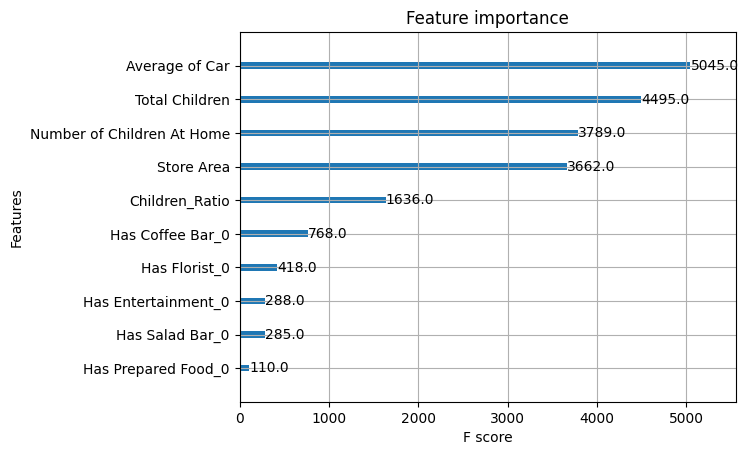

In [32]:
plot_importance(xgb_model)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>✔️ Conclusion:</font></h3>
    
**The average RMSLE in Train is: 0.29829686014426826 improve by XGBoost**